## Black Friday Dataset

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv("train.csv")
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df_test = pd.read_csv("test.csv")
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [6]:
df = pd.concat([df_train,df_test])
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


#### You can also use --------->   
1. pd.merge()
2. df = df_train.append(df_test)                 

In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df.isna().sum()
# you can also usue df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0


### Here User_ID not necessary

In [12]:
df.drop('User_ID', axis = 1, inplace = True)
# here axis is '0' or '1' axis=0 mean drop horizontally and axis=1 mean varically
# inplace=True mean ---> after delete it reset the dataset automatically

In [13]:
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0


### In my problem statement here they want to build a model.
### when it's about making model no charecter value is support now
### all the cherecter value of my test dataset need to convert as number

for that there are many ways 
1. pd.get_dummies()
2. .map()
and so on 

In [14]:
df['Gender'] = df['Gender'].map({
    'F': 0,
    'M': 1
})

df.head(10)

# you can also use:
#df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,26-35,20,A,1,1,8,NaN,NaN,7871.0


## One more thing here "Age" is also the categorical 

In [15]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
'''
 you can do that many ways:
 
1st way:
pd.get_dummies(df["Age"], drop_first=True)


2nd way:
one another technique you can also use that is LabelEncoder()

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df["Age"])

df.Age.unique()

and so on ........
'''

df['Age'] = df['Age'].map({
    '0-17':1,
    '18-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-50': 5,
    '51-55': 6,
    '55+':7
})

df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0


In [17]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
# now i show you how get_dummies work

df_city = pd.get_dummies(df['City_Category'])
df_city.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [19]:
#now merged:
df = pd.concat([df,df_city], axis = 'columns')  #you can also type axis=1
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,0,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,0,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,0,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,0,1


In [20]:
df.drop('City_Category', axis='columns', inplace=True)
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,0,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,0,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,0,1,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,0,1


In [21]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

### we should fix all the null value 

In [22]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

### replace the missing values by mode()

In [24]:
df["Product_Category_2"].mode()[0]

8.0

In [25]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [26]:
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,NaN,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,1,0,0


In [27]:
df["Product_Category_2"].isna().sum()

0

In [28]:
df['Product_Category_3'].mode()[0]

16.0

In [29]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0


In [30]:
df['Product_Category_3'].isna().sum()

0

In [31]:
df.shape

(783667, 13)

In [32]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [33]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [34]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [35]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Himel\AppData\Local\Temp\ipykernel_9132\66897005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [36]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [37]:
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  uint8  
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [39]:
# convert datatypes
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  uint8  
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [41]:
df['A'] = df['A'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int32  
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

### All ok now it's time to visualization

G:\Himel.conda\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

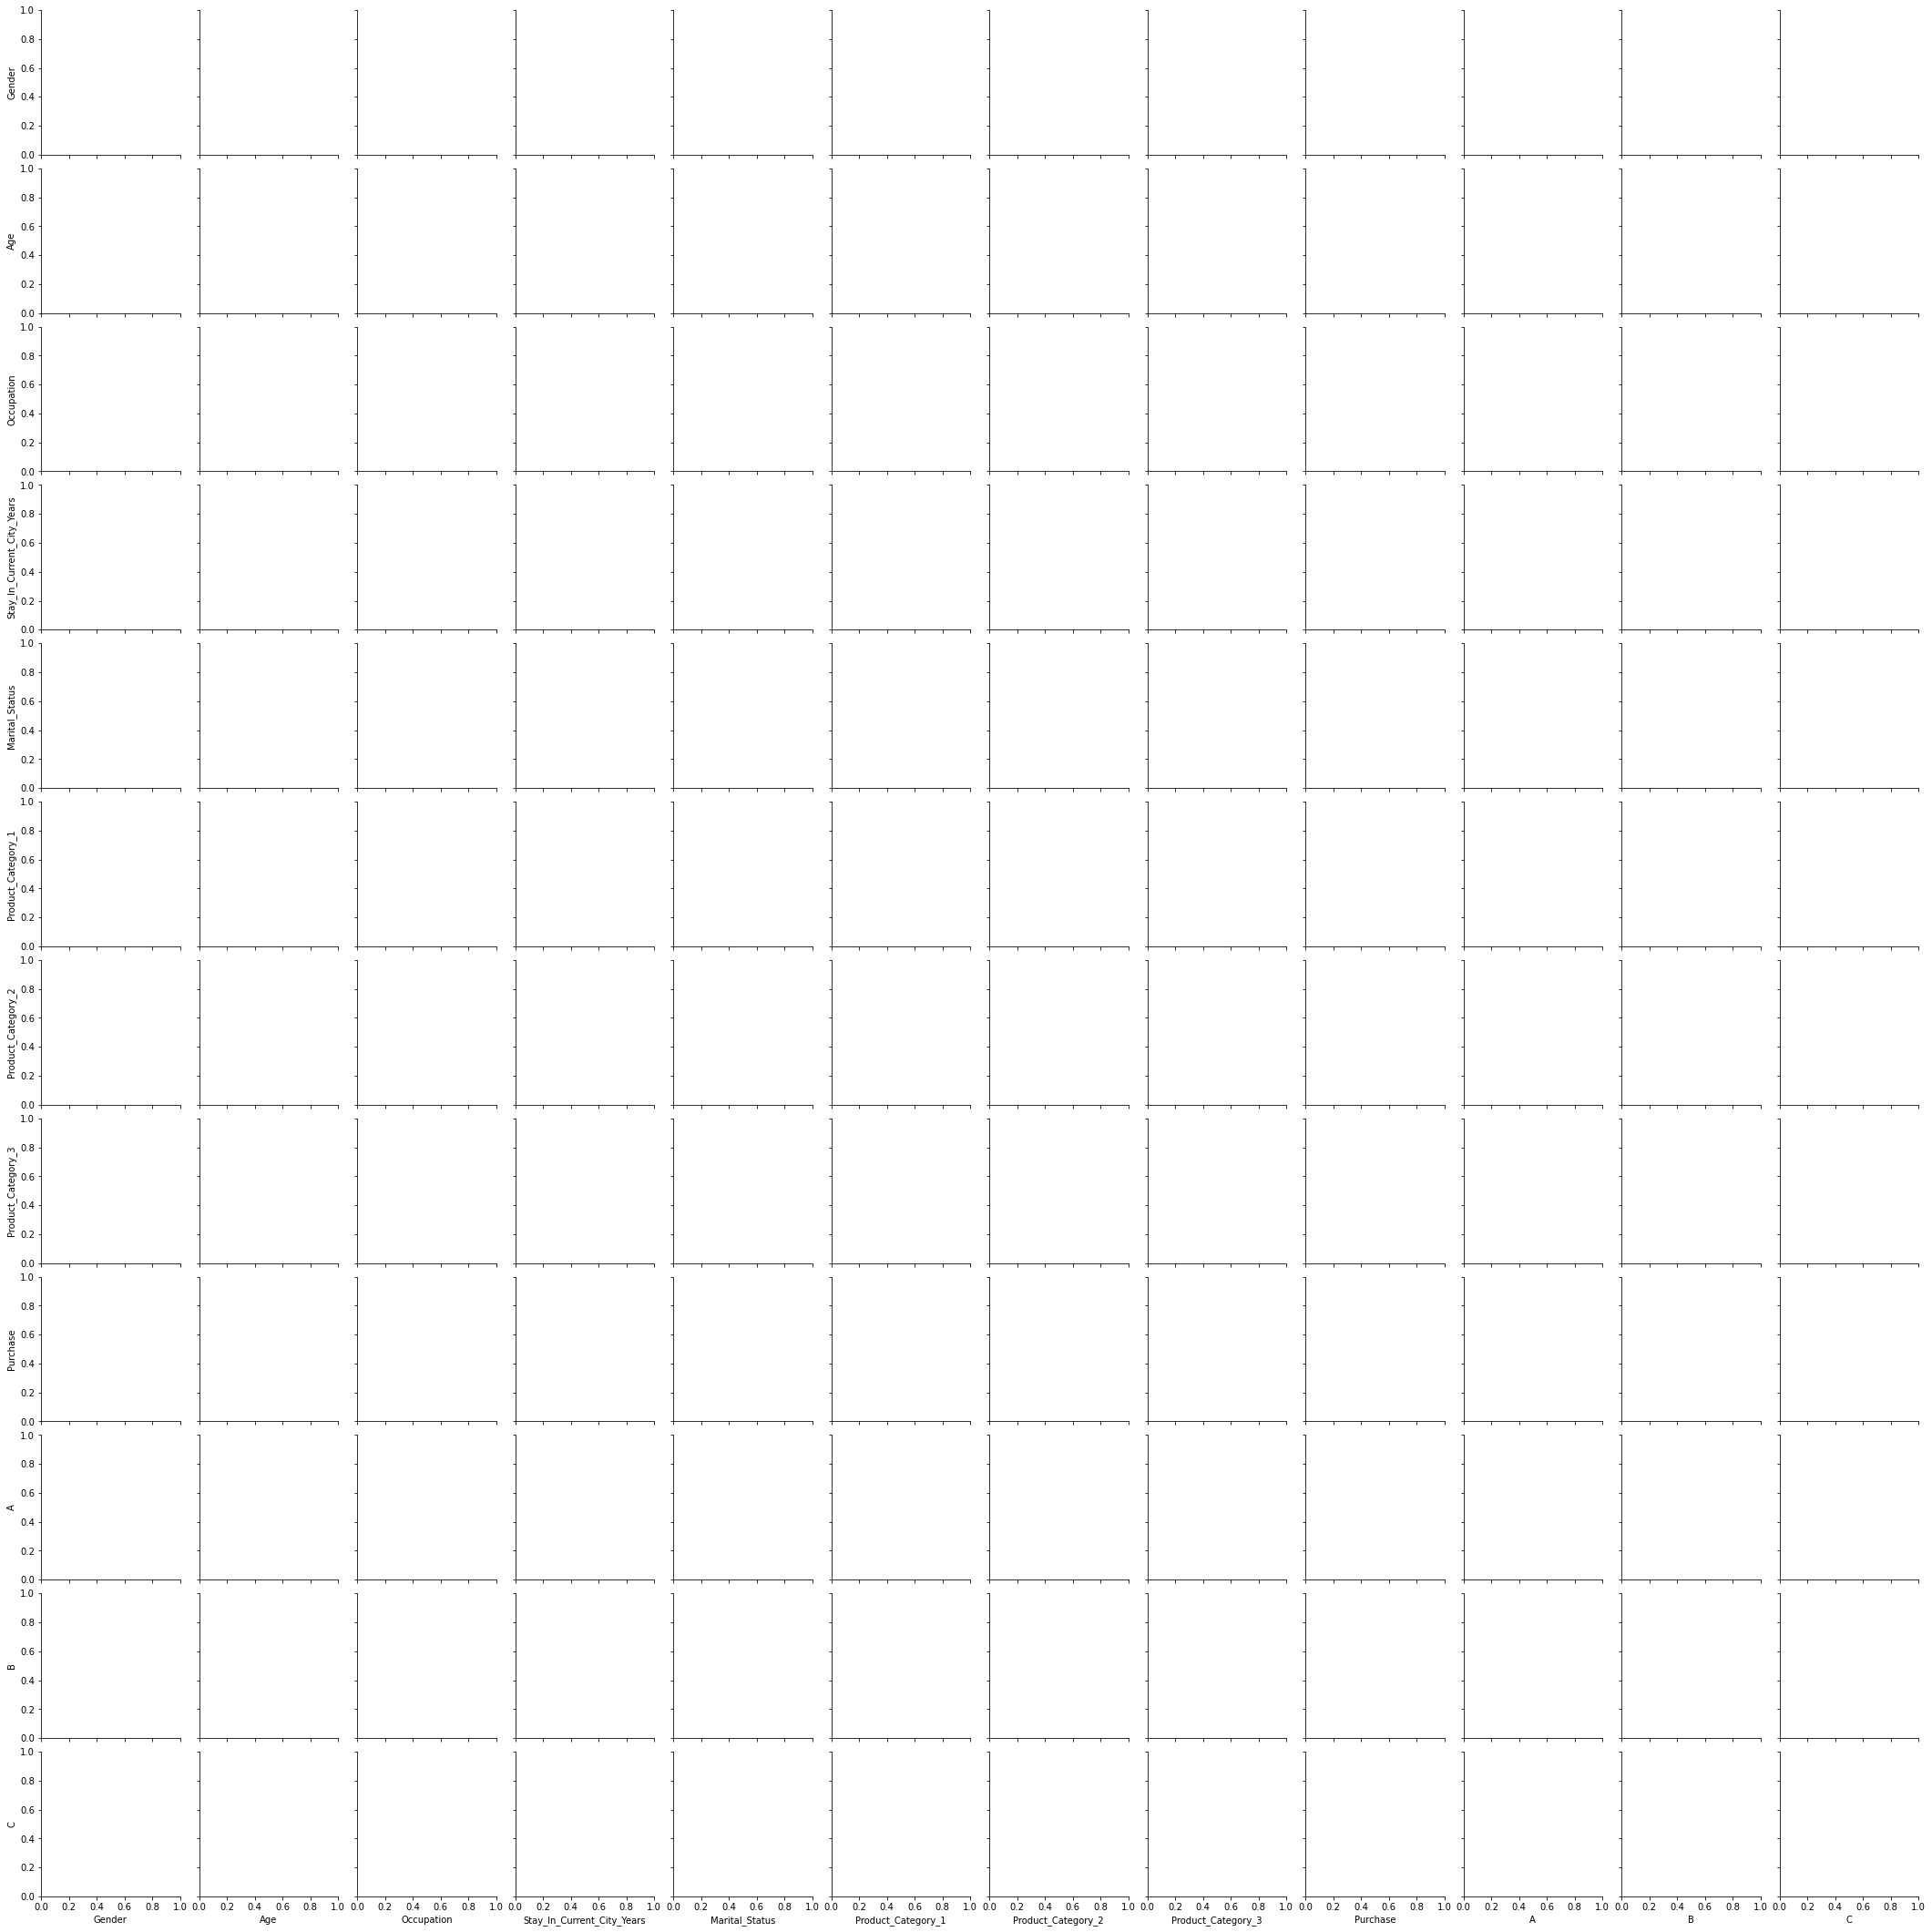

In [77]:
#sns.pairplot(df)

G:\Himel.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

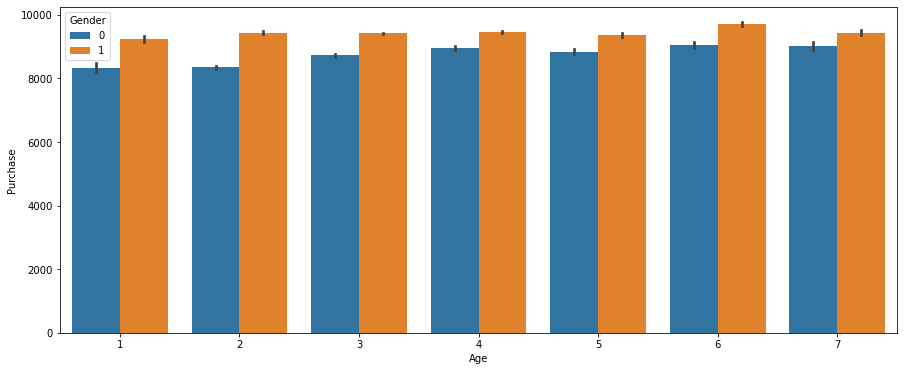

In [44]:
# Visualization age vs purchasing (male&female)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,6)
sns.barplot('Age','Purchase',hue='Gender',data=df)

### Observation 
Men will purchase more than women

G:\Himel.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

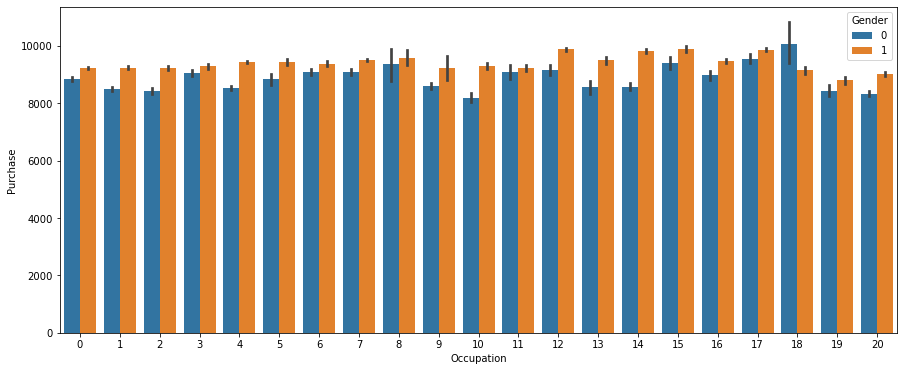

In [45]:
# Visualization Purchase with Occupassion

sns.barplot("Occupation","Purchase", hue="Gender", data=df)

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [47]:
df.drop("Product_ID", axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [48]:
# Purchase row null ------> 233599
df[df.Purchase.isnull()]

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,NaN,0,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,0,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,0,1,0
233597,0,5,1,4,0,10,16.0,16.0,NaN,0,0,1


In [49]:
# Purchase row not null ------> 55k+
df[~df['Purchase'].isnull()]

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368.0,0,1,0
550064,0,3,1,3,0,20,8.0,16.0,371.0,0,0,1
550065,0,3,15,4,1,20,8.0,16.0,137.0,0,1,0
550066,0,7,1,2,0,20,8.0,16.0,365.0,0,0,1


In [50]:
df_test1 = df[df.Purchase.isnull()]
df_train1 = df[~df['Purchase'].isnull()]

### Now it is ready to train and get a proper prediction 

# This part is not for EDA
## Here i am train this data it's called Feature Scaling


In [53]:
x1 = df_train1[:-1]
x1.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [54]:
x = x1.drop('Purchase', axis='columns')
x.head(3)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
0,0,1,10,2,0,3,8.0,16.0,1,0,0
1,0,1,10,2,0,1,6.0,14.0,1,0,0
2,0,1,10,2,0,12,8.0,16.0,1,0,0


In [55]:
y = x1.Purchase
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550062      473.0
550063      368.0
550064      371.0
550065      137.0
550066      365.0
Name: Purchase, Length: 550067, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)